<a href="https://colab.research.google.com/github/gverafei/wp/blob/main/correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Accessibility Challenges for Blind Users Authoring in Content Management Systems: An Empirical Study (Correlation Analysis)
Sep 2025



## Configure virtual environment

Only execute these lines the first time. I will ask to select a kernel from the upper right corner. Choose this virtual environment we just created.

In [1]:
!python3 -m venv .venv


In [2]:
!source .venv/bin/activate # Linux/Mac
# !.\venv\Scripts\activate # Windows

In [3]:
!pip install --upgrade pip --quiet

Initialize the repository on GitHub. All of this is done from the terminal.

In [ ]:
# !git init
# !git remote add origin https://github.com/gverafei/scraping.git
# !git pull origin main
# git add .
# git commit -m "Initial commit"
# git push --set-upstream origin main

### Install necessary packages

In [4]:
!pip install prettytable --quiet

In [5]:
!pip install tqdm --quiet

In [6]:
!pip install pandas --quiet

In [7]:
!pip install scipy --quiet

In [8]:
!pip install seaborn --quiet

### Normality Tests (Shapiro-Wilk)

Before choosing a statistical test, you should always ask:

**Do my data follow a normal distribution (a bell-shaped curve, like the Gaussian curve)?**

- If the data **is normally distributed**, you can use **parametric tests** like the t-test.
- If the data **is not normal**, you should use **non-parametric tests**, like the Spearman test.

To decide between Pearson and Spearman:

- If **p < 0.05** → the data is **not normal** → use **Spearman**.
- If **p ≥ 0.05** → the data **is normal** → use **Pearson**.


In [9]:
import pandas as pd
import scipy.stats as stats

# Datos
data = {
    "Errors": [0,3,2,16,14,4,19,2,2,23,2,125,14,78],
    "Alerts": [1,17,17,23,23,18,24,17,20,25,17,118,20,49],
    "E+A":    [1,20,19,39,37,22,43,19,22,48,19,243,34,127],
    "None":   [18,15,7,13,15,16,15,20,17,13,8,7,13,6],
    "Minor":  [6,1,2,2,3,2,4,2,5,2,2,1,2,1],
    "Significant": [0,5,5,5,6,4,3,2,2,5,4,3,8,2],
    "Critical": [0,3,10,4,0,2,2,0,0,4,10,13,1,15]
}
df = pd.DataFrame(data)

print("\nShapiro-Wilk Normality Tests:")
for column in data:
    stat, p = stats.shapiro(df[column])
    print(f'{column}: W={stat:.4f}, p-value={p:.4f}')



Shapiro-Wilk Normality Tests:
Errors: W=0.6218, p-value=0.0001
Alerts: W=0.5802, p-value=0.0000
E+A: W=0.6156, p-value=0.0001
None: W=0.9162, p-value=0.1938
Minor: W=0.8040, p-value=0.0056
Significant: W=0.9651, p-value=0.8052
Critical: W=0.8216, p-value=0.0094


### Interpretation of Normality Results

The key variables (Errors, Alerts, E+A, Minor, Critical) have **p-values < 0.05**, which indicates they **do not follow a normal distribution**.

**Reflection**

Since several of the analyzed variables are **not normally distributed**, using the **Spearmen test** is more appropriate than the Pearson because:

- It **does not assume normality**.
- It is **robust to skewed distributions and outliers**.
- It is **suitable for small samples**, as in this case.

**Conclusion:**
- The **t-test is not suitable** in this context.
- The use of the **Spearman test in this study is statistically justified**.


### Correlation Analysis (Spearman)

WAVE metrics Vs BW barries.

- Spearman correlation is used to measure **whether two variables tend to increase or decrease together**.
- It’s ideal when data is **not normally distributed** or the relationship is **not linear**.
- Unlike comparison tests, it tells us **how strongly two variables are related**.

**How does it work?**  
- It ranks the values of each variable.
- It compares the rankings to assess **how similar their trends are**.
- The result is a coefficient called **rho (ρ)**:

| ρ (rho) Value | Interpretation |
|:-------------:|:-------------------------------|
| +1.0          | Perfect positive correlation: as one increases, the other also increases. |
| -1.0          | Perfect negative correlation: as one increases, the other decreases. |
|  0.0          | No correlation at all. |

**When do we use it in this study?**  
- To examine relationships like:
  - Do **more tokens** result in **higher accessibility**?
  - Do **more WAVE errors** mean **lower accessibility**?

**In short:**  
> Spearman tells us **how well two variables move together**, regardless of shape or distribution.


## Visualizations


### Color palette

In [10]:
# Configurar colores
color_claro = "#AED6F1"
color_medio = "#5DADE2"
color_fuerte = "#1B4F72"
color_borde = "#2874A6"

color_negro = "#000000"  # negro
color_rojo = "#FF0000"  # rojo

### Scatterplots — Correlations


#### 2.3 WAVE Errors vs Accessibility Score

In [11]:
import pandas as pd
from scipy.stats import shapiro, pearsonr, spearmanr

# Usamos el DataFrame (df) definido más arriba

# Función auxiliar
def analyze(x, y, label_x, label_y):
    print(f"\n--- {label_x} vs {label_y} ---")
    
    # Shapiro-Wilk
    print("Shapiro-Wilk:")
    print(f"{label_x}: {shapiro(df[x])}")
    print(f"{label_y}: {shapiro(df[y])}")
    
    # Correlaciones
    pearson_corr = pearsonr(df[x], df[y])
    spearman_corr = spearmanr(df[x], df[y])
    
    print(f"Pearson: r={pearson_corr[0]:.2f}, p={pearson_corr[1]:.3f}")
    print(f"Spearman: rho={spearman_corr[0]:.2f}, p={spearman_corr[1]:.3f}")

# Comparaciones
analyze("Errors", "None", "Errors", "None")
analyze("Errors", "Critical", "Errors", "Critical")
analyze("Alerts", "Significant", "Alerts", "Significant")
analyze("Alerts", "Minor", "Alerts", "Minor")



--- Errors vs None ---
Shapiro-Wilk:
Errors: ShapiroResult(statistic=np.float64(0.621821380418726), pvalue=np.float64(6.390634926467455e-05))
None: ShapiroResult(statistic=np.float64(0.916200996729415), pvalue=np.float64(0.19382553275144876))
Pearson: r=-0.60, p=0.025
Spearman: rho=-0.55, p=0.040

--- Errors vs Critical ---
Shapiro-Wilk:
Errors: ShapiroResult(statistic=np.float64(0.621821380418726), pvalue=np.float64(6.390634926467455e-05))
Critical: ShapiroResult(statistic=np.float64(0.8216462622659375), pvalue=np.float64(0.009362734052873356))
Pearson: r=0.69, p=0.006
Spearman: rho=0.52, p=0.058

--- Alerts vs Significant ---
Shapiro-Wilk:
Alerts: ShapiroResult(statistic=np.float64(0.58023863893744), pvalue=np.float64(2.7183754670782477e-05))
Significant: ShapiroResult(statistic=np.float64(0.9650967081428394), pvalue=np.float64(0.8052148211883101))
Pearson: r=-0.07, p=0.801
Spearman: rho=0.10, p=0.734

--- Alerts vs Minor ---
Shapiro-Wilk:
Alerts: ShapiroResult(statistic=np.float64(

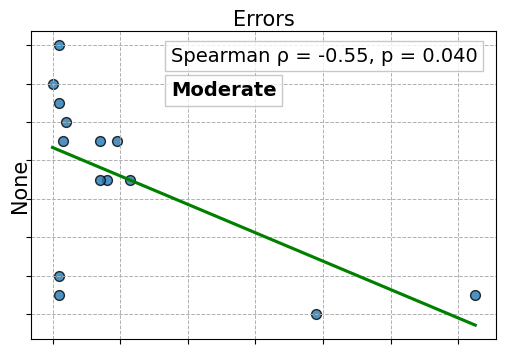

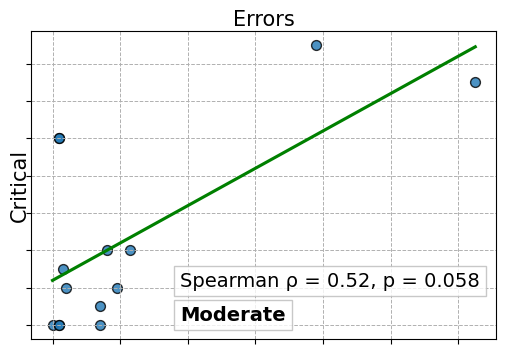

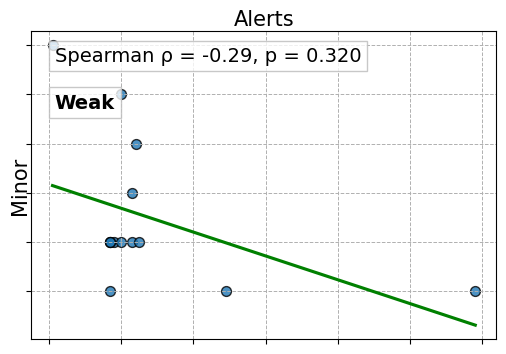

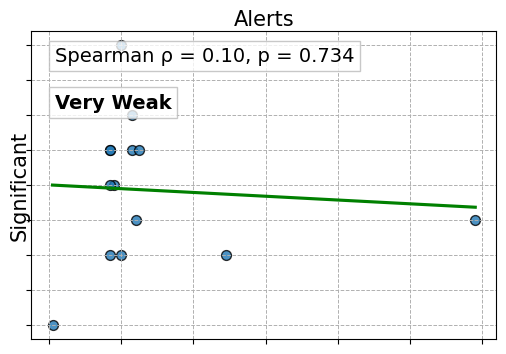

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Función para clasificar la fuerza de la correlación
def classify_corr(r):
    r_abs = abs(r)
    if r_abs < 0.2:
        return "Very Weak"
    elif r_abs < 0.4:
        return "Weak"
    elif r_abs < 0.6:
        return "Moderate"
    elif r_abs < 0.8:
        return "Strong"
    else:
        return "Very Strong"

def plot_with_corr(x, y, title, image_name, pos_x=0.05, pos_y=0.95, pos_y2=0.75):
    # Alterno
    color_medio = "green"
    # color_medio = "#FE7D28"

    plt.figure(figsize=(6,4))
    sns.regplot(x=x, y=y, data=df, scatter_kws={'s':50, 'edgecolor':'black'}, 
                line_kws={"color":color_medio}, ci=None)
    
    # Calcular correlaciones
    r, p_r = pearsonr(df[x], df[y])
    rho, p_rho = spearmanr(df[x], df[y])
    
    # Clasificación de Spearman
    strength = classify_corr(rho)
    
    # Anotar cuadro con Pearson y Spearman
    # plt.text(pos_x, pos_y,
    #          f"Pearson r = {r:.2f}, p = {p_r:.3f}\nSpearman ρ = {rho:.2f}, p = {p_rho:.3f}", 
    #          transform=plt.gca().transAxes, fontsize=14,
    #          verticalalignment='top', bbox=dict(boxstyle="square,pad=0.3", 
    #          facecolor="white", edgecolor="#BBB", alpha=0.8))
    
    plt.text(pos_x, pos_y,
             f"Spearman ρ = {rho:.2f}, p = {p_rho:.3f}", 
             transform=plt.gca().transAxes, fontsize=14,
             verticalalignment='top', bbox=dict(boxstyle="square,pad=0.3", 
             facecolor="white", edgecolor="#BBB", alpha=0.8))
    
    # Añadir leyenda debajo con la interpretación de la fuerza
    plt.text(pos_x, pos_y2, f"{strength}", 
                transform=plt.gca().transAxes, fontsize=14, fontweight='bold', bbox=dict(boxstyle="square,pad=0.3", 
                facecolor="white", edgecolor="#BBB", alpha=0.8))

    # Ocultar números de ejes 
    plt.gca().set_xticklabels([]) 
    plt.gca().set_yticklabels([])
    
    # Ajustes estéticos
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15, labelpad=-6)
    plt.gca().xaxis.set_label_position('top')

    # plt.title(title)
    plt.grid(linestyle='--', linewidth=0.7)
    # plt.tight_layout()
    
    # Guardar y mostrar
    plt.savefig(f'figures/{image_name}.png', dpi=500, bbox_inches="tight")
    plt.show()

# Ejemplos
plot_with_corr("Errors", "None", "Scatterplot: Errors vs None", "Fig_7a", pos_x=0.3, pos_y=0.95, pos_y2=0.79)
plot_with_corr("Errors", "Critical", "Scatterplot: Errors vs Critical", "Fig_7b", pos_x=0.32, pos_y=0.22, pos_y2=0.06)
plot_with_corr("Alerts", "Minor", "Scatterplot: Alerts vs Minor", "Fig_7c")
plot_with_corr("Alerts", "Significant", "Scatterplot: Alerts vs Significant", "Fig_7d")
